In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [34]:
%run -i ./ownlib/PHT-Library.ipynb

In [16]:
ori_img = cv2.imread('./assets/maudy.png', 0)
ori_logo = cv2.imread('./assets/squares.png', 0)

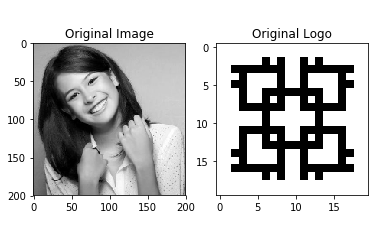

In [17]:
N = 200
G = 20
P = 2*G
T_STEP = int(P / 4) + 1
I_STEP = int(N / 8) + 1

# Preprocess Image
IMG = cv2.resize(ori_img, (N, N))

# Preprocess Logo
LOGO = cv2.resize(ori_logo, (G,G))
LOGO = (LOGO >= 128) * 1

# Show Image and Logo
imshow2(IMG, LOGO, 'Original Image', 'Original Logo')

Progress: [####################] 100.0%


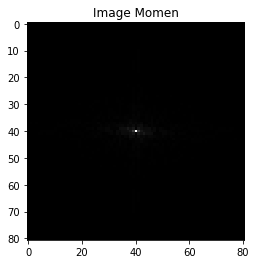

In [18]:
MOMEN = transformPHT(IMG, N, P)
imshow(MOMEN, 'Image Momen')

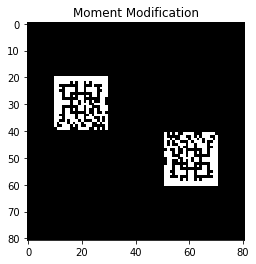

In [28]:
DELTA = 0.5

# 
matQ = np.floor(np.abs(MOMEN) / DELTA) % 2

# 
P2 = P * 2 + 1
doubleLogo = np.zeros((P2, P2))
doubleLogo[P+1:P+1+G, P+1+int(G/2):P+1+int(3*G/2)] = LOGO
doubleLogo = doubleLogo + np.rot90(np.rot90(doubleLogo))

# 
doubleLogoFilter = np.zeros((P2, P2))
doubleLogoFilter[P+1:P+1+G, P+1+int(G/2):P+1+int(3*G/2)] = 1
doubleLogoFilter = doubleLogoFilter + np.rot90(np.rot90(doubleLogoFilter))
        
# 
OMEGA = DELTA * ((doubleLogo != matQ)) / np.abs(MOMEN) * MOMEN
OMEGA = OMEGA * doubleLogoFilter

# 
imshow(OMEGA, 'Moment Modification')

Progress: [####################] 100.0%


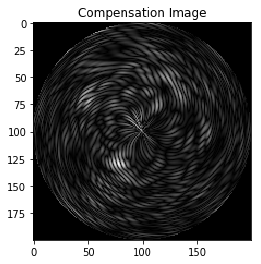

In [30]:
EPSILON = inversePHT(OMEGA, N, P)
imshow(EPSILON, 'Compensation Image')

Progress: [####################] 100.0%


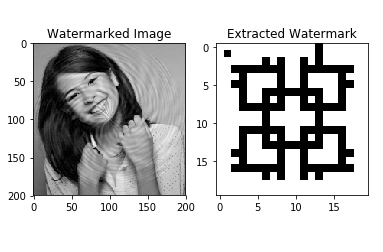

In [31]:
IMG_WATERMARKED = IMG + EPSILON
MOMEN_WATERMARKED = transformPHT(IMG_WATERMARKED, N, P)
EXTRACTED_WATERMARK = np.floor(np.abs(MOMEN_WATERMARKED) / DELTA) % 2

EXTRACTED_WATERMARK_CROPPED = EXTRACTED_WATERMARK[P+1:P+1+G, P+1+int(G/2):P+1+int(3*G/2)]

imshow2(IMG_WATERMARKED, EXTRACTED_WATERMARK_CROPPED, 'Watermarked Image', 'Extracted Watermark')